### Econ 176 APIs Day 2 - and ***first computing assignment***

We're back! [Here was Day 1](https://colab.research.google.com/drive/1laKhKCXTFtCAGKrOqQfisbGPyQE-xexm#scrollTo=nCAN5xmzEP9t&uniqifier=1)

<font size="-1">Today, we'll continue building familiarity with APIs through calling and analyzing the results (using Python, of course!)

#### Where were we?

We had tried the International Space Station API at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json) :

In [1]:
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

<Response [200]>

In [2]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... remember that a json object is a Python dictionary:

json_contents is {'iss_position': {'longitude': '117.3175', 'latitude': '22.0379'}, 'message': 'success', 'timestamp': 1739650399}


In [3]:
#
# Let's remind ourselves how dictionaries work:

lat = json_contents['iss_position']['latitude']
lat = float(lat)
print("lat: ", lat)

lat:  22.0379


Here is a function that returns the distance detween two (lat/long) pairs:


<font size="-2">

```   
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import *
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))
```
</font>

#### <font color="Coral"><b>Task 0</b></font> &nbsp;&nbsp; Let's, together, create a program that finds the distance from the ISS to Claremont
+ It can just be a cell, it doesn't have to be its own function.
+ But, let's definitely use the haversine function, above...





In [1]:

import requests
from math import radians, sin, cos, sqrt, asin

url = "http://api.open-notify.org/iss-now.json"
result = requests.get(url)
json_contents = result.json()

# Extracting latitude and longitude of the ISS
iss_lat = float(json_contents['iss_position']['latitude'])
iss_long = float(json_contents['iss_position']['longitude'])

print(f"ISS Current Location: Latitude={iss_lat}, Longitude={iss_long}")

# Coordinates of Claremont:
claremont_lat = 34.0967
claremont_long = -117.7198

lat1, long1, lat2, long2 = map(radians, [iss_lat, iss_long, claremont_lat, claremont_long])
dlat = lat2 - lat1
dlong = long2 - long1
a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
c = 2 * asin(sqrt(a))
radius = 3956
distance_manual = radius * c

print(f"Manual Distance Calculation (without AI): {distance_manual:.2f} miles")


ISS Current Location: Latitude=49.0997, Longitude=173.9977
Manual Distance Calculation (without AI): 3546.55 miles


In [2]:
def haversine(lat1, long1, lat2, long2):
    from math import radians, sin, cos, sqrt, asin
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    radius = 3956
    return radius * 2 * asin(sqrt(trig))

distance_ai = haversine(iss_lat, iss_long, claremont_lat, claremont_long)

print(f"Distance Calculation (using AI/haversine function): {distance_ai:.2f} miles")

# Comparing both results
if abs(distance_manual - distance_ai) < 0.01:
    print("Both calculations are similar!")
else:
    print("There is a difference.")


Distance Calculation (using AI/haversine function): 3546.55 miles
Both calculations are similar!


Vice-versa is ok, too...

<br>
<hr>
<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)

In [3]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [4]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
d = astronauts   # a shorter variable for convenience..


# Remember:  astronauts will be a _dictionary_
note = """ here's yesterday evening's result - it _should_ be the same this morning!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "Econ176_Participant_6 Guangsu"},
{"craft": "Tiangong", "name": "Econ176_Participant_6 Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
print(d)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [5]:
d['people']

[{'craft': 'ISS', 'name': 'Oleg Kononenko'},
 {'craft': 'ISS', 'name': 'Nikolai Chub'},
 {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
 {'craft': 'ISS', 'name': 'Matthew Dominick'},
 {'craft': 'ISS', 'name': 'Michael Barratt'},
 {'craft': 'ISS', 'name': 'Jeanette Epps'},
 {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
 {'craft': 'ISS', 'name': 'Butch Wilmore'},
 {'craft': 'ISS', 'name': 'Sunita Williams'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'},
 {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]

This is pretty intricate!

Let's try unpacking this - _parsing it_ - with an in-class, break-out challenge...

#### <font color="Coral"><b>Task 1</b></font>: &nbsp;&nbsp; In-class break-out ...

<br>
<hr>
<br>

### Ok!  

#### You should add to your resume that
+ you have experience with traditional _web-scraping_
+ and with making - and interpreting - _API calls_
+ whether they convey plain-text or json-structured data...

<br>

Let's go deeper, to
+ see how the API "endpoints" themselves are implemented
+ see how parameters can be used in calling API endpoints
  + at least, with GET requests
  + POST requests are also common - that's for another day


### _Behind the Curtain_ of an API:

Let's watch _inside_ API calls, using CodeSandbox...

Specifically, let's practice using <u>parameters</u> to an API call:


### GET parameters

The GET request includes all of the information needed in the URL itself!

Here are a couple of images showing the _pieces_ of urls:

<img src="https://static.semrush.com/blog/uploads/media/ca/37/ca3737d8edb5cf079aaf1f11ae01d286/mMREmiwXSrryVyv8IxbVFgje7ICFhfqWnca7W0db36KjX35vzLTnStkFynEd9NBoXXH-JYKCm2deskxgLo_vxzEvl-qLpVOgtwc78rhFI2Rm1pBK-j2SwMKWz0CXU42STjzUVcF1vaRTFbw_6wvH_5A.webp">

#### Using query-string parameters

**Challenge!**

Team up with people nearby and make API calls to the endpoints

+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery0"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery1"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery2"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery3"`

_each_ of which uses query-string parameters
+ `x` (an integer) and
+ `y` (an integer)

and see if you can determine what each one is doing... and how the parameters are being used?!

<br>



In [ ]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery0?x=1&y=3"    # perhaps try from browser first!
result_ft = requests.get(url)
# print(result_ft)              # prints the status_code

d = result_ft.json()            # here are the _contents_
d

We can create larger custom API calls, as well...

For example,

In [ ]:
#
# A larger API call to the same CodeSandbox server

import requests

url = "https://fvcjsw-5000.csb.app/fintech"    # try this from your browser first!
result_ft = requests.get(url)
result_ft

<Response [200]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result_ft.json()                  # try .text, as well...
print(f"The resulting data is {d}")

The resulting data is {'Number': 176, 'Initials': ['AC', 'AL', 'AN', 'AP', 'AZ', 'CL', 'CM', 'CW', 'CZ', 'DS', 'EC', 'ED', 'EG', 'ES', 'HV', 'IC', 'IG', 'JB', 'JN', 'JT', 'KR', 'LA', 'LG', 'LS', 'LW', 'MD', 'ND', 'NM', 'NV', 'NW', 'OB', 'RK', 'RL', 'RP', 'SB', 'SC', 'SD', 'SF', 'SS', 'TC', 'TS', 'VN', 'VVP', 'YM', 'ZD', 'ZY'], 'Departments': ['Econ', 'CS']}


**Challenge**:   extract your initials from `d`   &nbsp;&nbsp; 😀


<b><font color="DodgerBlue">Hint</font></b>: &nbsp;&nbsp; Start with &nbsp;&nbsp;  ``d[ <something> ]``   &nbsp;&nbsp;   What's the ``something``?

<i>Only do one step at a time...</i>  &nbsp;&nbsp; This is key!

In [ ]:
#
# see if you can extract only your initials from d
d

# we're not finished yet! :)

<br>
<hr>
<br>

### Another API, now _finance-inspired_ ...

There are **lots** of finance APIs. I'm currently skeptical that they're materially different, though I'm happy to be convinced... .

One material difference is price! The kind folks at _Alphavantage_ have offered us an Econ176-specific set of API keys. Let's dive in!

Before using your key, try a demonostration call at this endpoint:

`https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo`

which, as ever, is this link:

[https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo](https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo)

You'll see that it's the last 100 days of information from IBM. To obtain other symbols' data - or other data - you'll need to use your API key. Notice that the demo url, above, has `demo` as the `apikey` (it only works for IBM 😀)

You should have your own API key, from class on 2/6:
+ if you use that string of characters in place of ``demo`` above, you should be able to make calls to _any_ of the Alphavantage APIs
+ it has "medium" bandwidth - for us, we are making single calls and then analyzing them, which will not stress any limits <br> <font size="-2">(Do avoid fast loops: if too much bandwidth is used, they APIs will automatically disable the key.)</font>
+ _Experiment!_

### Getting comfortable with documentation...

APIs come with widely varying documentation
+ sometimes you're guessing (as we did above!)
+ more often, they're documented... **but** the documentation tends to have lots of idiosynrasies (there's not as much standardization as one might hope on how these things are discussed, the computing languages presumed, etc.)

So, it's a worthy task - and challenge - to get familiar with the many kinds and conventions of documentation out there.

Take a look at the [Alphvantage documentation](https://www.alphavantage.co/documentation/):
+ specifically, find the section for the `TIME_SERIES_DAILY` function
+ read over the parameters
+ click on some of the examples
+ see if you can reconcile the outputs you're seeing with the parameters provided

Next, we'll try it out...

... and will determine the best "single-share" strategy for investing -- for your choice of stock -- over the past 100 days. <br> <font size="-2">(You might remember this as a cs5 homework, the ["TT Securities" problem](https://www.cs.hmc.edu/twiki/bin/view/CS5Fall2023/TTSecuritiesGold).)</font>

<br>
<hr>
<br>

### Your tasks!

**<font color="Coral">Part 1</font>: &nbsp;&nbsp; <font color="DodgerBlue">Single-share Analysis</font>** &nbsp; using TIME_SERIES_DAILY

So, your tasks include
+ get your API working - the first cell below will help
+ make sure you're getting data! - the second cell below will help with that!
+ choose another stock symbol
  + for now, let's stick with the compact data of the last 100 days
  + also, be sure to make _one_ call and then code-develop with that data
  + it will quickly annoy API providers if you make too many calls
  + there are automatic "shutoffs" to stop responding in this case...
  + it's not clear when the "shutoff" stops - possibly never

<br>

So, after making one call, explore the resulting data (dictionary) so that you
+ programmatically extract the 100 prices (let's use the **closing** price)
+ create a list with them
+ find the maximum and the minimum
  + also find the _date_ of the max and the _date_ of the min
  + be sure to print those out...
+ create a **graph** of your list &nbsp; (suggestion: use AI for graphing help)
  + get the AI to highlight the max and the min
+ "Single-share" analysis: &nbsp; Find the buy day and sell day that maximize `(sell price - buy price)`
  + make sure that you sell _at or after_ you buy...
+ print your results
+ re-graph your 100-day signal, and highlight the buy day and the sell day you just found
  + you might ask to use ``seaborn`` or ``matplotlib`` - both are libraries available in Colab (and libraries that the AI knows well)

<br>

Once you have a workflow that works, try it with a different stock symbol!
+ do the same thing for the other signal: print the best single-share strategy - and graph
+ compare the results in your overall reflection below
+ you could wrap the workflow pieces into a function that takes a stock symbol as input! (This is optional and cs-y.)

<br>

**<font color="Coral">Part 2</font>: &nbsp;&nbsp; <font color="DodgerBlue">Use and Analyze <u>another</u> Alphavantage API</font>** &nbsp; ... of your choice
+ Look over the left-hand column of APIs in the [Alphavantage documentation](https://www.alphavantage.co/documentation/)
+ Choose another API that seems interesting to you, then
+ Explore and tinker to successfully use it, then
+ Analyze a subset of the data from the resulting call, then
+ Share, briefly, what you found.
  + The analysis does not need to be involved. For example,
  + finding the max and min of a value is wonderful - and definitely enough
  + or, the average, or sum, or ... really anything,
  + as long as it means you've looked through each time step of the data-sequence received  <font size="-1">(not each piece of data, just each time step)</font>
+ <font color="Coral"><b>EC</b></font> Totally optional: <font size="-1">Find a function for comparing time-series trends, import it, and then use it to compare one of your stock prices with your _other_ Alphavantage signal. Report what you find! (up to +10%) &nbsp;&nbsp; Initial library leads: ``statsmodels``, ``darts``, and/or ``sktime`` ...</font>

<br>

Some of the other APIs that look especially interesting, at least to me:
+ News & Sentiments
+ Income Statement / Balance Sheet
+ GDP per capita
+ Exchange rates
+ Coffee!



<br>
<hr>
<br>

### Onward!

In [6]:
#
# Let's request!   Just using the demo, for now:

import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo"    # demo version
result = requests.get(url)
result

<Response [200]>

In [8]:
#
# Let's view ... then parse and interpret!

d = result.json()
print(d)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2025-02-14', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-02-14': {'1. open': '407.7900', '2. high': '408.9100', '3. low': '405.8800', '4. close': '408.4300', '5. volume': '22758464'}, '2025-02-13': {'1. open': '407.0000', '2. high': '411.0000', '3. low': '406.3600', '4. close': '410.5400', '5. volume': '23891731'}, '2025-02-12': {'1. open': '407.2100', '2. high': '410.7500', '3. low': '404.3673', '4. close': '409.0400', '5. volume': '19121734'}, '2025-02-11': {'1. open': '409.6400', '2. high': '412.4900', '3. low': '409.3000', '4. close': '411.4400', '5. volume': '18140592'}, '2025-02-10': {'1. open': '413.7100', '2. high': '415.4624', '3. low': '410.9200', '4. close': '412.2200', '5. volume': '20817919'}, '2025-02-07': {'1. open': '416.4800', '2. high': '418.6500', '3. low': '408.1000', '4. close': '409.7500', '5

In [9]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)
# Let's look at all of the keys...

# Aha! they are dates... let's create a function to compare two dates

2025-02-14
2025-02-13
2025-02-12
2025-02-11
2025-02-10
2025-02-07
2025-02-06
2025-02-05
2025-02-04
2025-02-03
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-10
2025-01-08
2025-01-07
2025-01-06
2025-01-03
2025-01-02
2024-12-31
2024-12-30
2024-12-27
2024-12-26
2024-12-24
2024-12-23
2024-12-20
2024-12-19
2024-12-18
2024-12-17
2024-12-16
2024-12-13
2024-12-12
2024-12-11
2024-12-10
2024-12-09
2024-12-06
2024-12-05
2024-12-04
2024-12-03
2024-12-02
2024-11-29
2024-11-27
2024-11-26
2024-11-25
2024-11-22
2024-11-21
2024-11-20
2024-11-19
2024-11-18
2024-11-15
2024-11-14
2024-11-13
2024-11-12
2024-11-11
2024-11-08
2024-11-07
2024-11-06
2024-11-05
2024-11-04
2024-11-01
2024-10-31
2024-10-30
2024-10-29
2024-10-28
2024-10-25
2024-10-24
2024-10-23
2024-10-22
2024-10-21
2024-10-18
2024-10-17
2024-10-16
2024-10-15
2024-10-14
2024-10-11
2024-10-10
2024-10-09
2024-10-08
2024-10-07
2024-10-04

In [10]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

['2025-02-14',
 '2025-02-13',
 '2025-02-12',
 '2025-02-11',
 '2025-02-10',
 '2025-02-07',
 '2025-02-06',
 '2025-02-05',
 '2025-02-04',
 '2025-02-03',
 '2025-01-31',
 '2025-01-30',
 '2025-01-29',
 '2025-01-28',
 '2025-01-27',
 '2025-01-24',
 '2025-01-23',
 '2025-01-22',
 '2025-01-21',
 '2025-01-17',
 '2025-01-16',
 '2025-01-15',
 '2025-01-14',
 '2025-01-13',
 '2025-01-10',
 '2025-01-08',
 '2025-01-07',
 '2025-01-06',
 '2025-01-03',
 '2025-01-02',
 '2024-12-31',
 '2024-12-30',
 '2024-12-27',
 '2024-12-26',
 '2024-12-24',
 '2024-12-23',
 '2024-12-20',
 '2024-12-19',
 '2024-12-18',
 '2024-12-17',
 '2024-12-16',
 '2024-12-13',
 '2024-12-12',
 '2024-12-11',
 '2024-12-10',
 '2024-12-09',
 '2024-12-06',
 '2024-12-05',
 '2024-12-04',
 '2024-12-03',
 '2024-12-02',
 '2024-11-29',
 '2024-11-27',
 '2024-11-26',
 '2024-11-25',
 '2024-11-22',
 '2024-11-21',
 '2024-11-20',
 '2024-11-19',
 '2024-11-18',
 '2024-11-15',
 '2024-11-14',
 '2024-11-13',
 '2024-11-12',
 '2024-11-11',
 '2024-11-08',
 '2024-11-

In [11]:
#
# Let's flip the DATES around:
DATES.reverse()
DATES

# Yay!

['2024-09-23',
 '2024-09-24',
 '2024-09-25',
 '2024-09-26',
 '2024-09-27',
 '2024-09-30',
 '2024-10-01',
 '2024-10-02',
 '2024-10-03',
 '2024-10-04',
 '2024-10-07',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-04',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-29',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-16',
 '2024-12-17',
 '2024-12-18',
 '2024-12-19',
 '2024-12-20',
 '2024-12-23',
 '2024-12-24',
 '2024-12-

In [12]:
# Oooh... Now let's see what's in each key (date)

val = float(d['Time Series (Daily)']['2025-01-21']['4. close'])  # Aha! it's a dictionary again!  We will need to index again!!
val

428.5

In [13]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [16]:
# A loop to find the minimum closing price
#

min_price = 10000000
min_key = "nothing"

for date in d['Time Series (Daily)']:
    closing =  get_closing(date, d)
    # print(f"date is {date} and closing is {closing}")
    if closing < min_price:
        min_price = closing
        min_price_date = date

print(f"min_price_date is {min_price_date} and min_price = {min_price}")


min_price_date is 2024-10-31 and min_price = 406.35


#### Onward into the tasks, as listed above...
+ perhaps first, make sure you can repeat the above cells with a _different_ stock ticker
+ perhaps then create a **list** of all of the closing prices
+ from there, you're ready for the analysis + graphing...

Enter stock ticker symbol (e.g., AAPL, MSFT, IBM): MSFT

Max Price: $454.46 on 2024-12-17
Min Price: $406.35 on 2024-10-31
Best Buy Date: 2025-02-14, Sell Date: 2024-12-17, Max Profit: $46.03


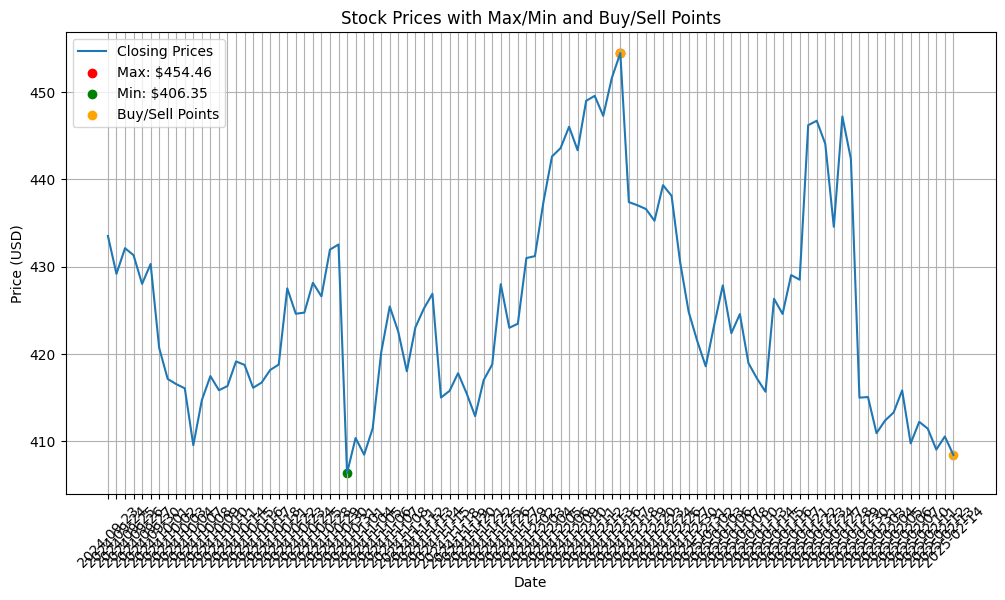

In [1]:
import requests
import matplotlib.pyplot as plt

def fetch_stock_data(symbol, api_key="demo"):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"
    result = requests.get(url)
    return result.json()

def get_closing(date, data):
    return float(data['Time Series (Daily)'][date]['4. close'])

def analyze_stock(data):
    time_series = data['Time Series (Daily)']
    dates = list(time_series.keys())
    closing_prices = [get_closing(date, data) for date in dates]

    max_price = max(closing_prices)
    min_price = min(closing_prices)
    max_date = dates[closing_prices.index(max_price)]
    min_date = dates[closing_prices.index(min_price)]

    max_profit = 0
    buy_date = sell_date = ""
    for i in range(len(closing_prices)):
        for j in range(i+1, len(closing_prices)):
            profit = closing_prices[j] - closing_prices[i]
            if profit > max_profit:
                max_profit = profit
                buy_date = dates[i]
                sell_date = dates[j]

    return dates, closing_prices, max_price, max_date, min_price, min_date, buy_date, sell_date, max_profit

def plot_stock(dates, prices, max_price, max_date, min_price, min_date, buy_date, sell_date):
    dates.reverse()
    prices.reverse()
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label='Closing Prices')
    plt.scatter([max_date], [max_price], color='red', label=f'Max: ${max_price}', marker='o')
    plt.scatter([min_date], [min_price], color='green', label=f'Min: ${min_price}', marker='o')
    plt.scatter([buy_date, sell_date], [prices[dates.index(buy_date)], prices[dates.index(sell_date)]], color='orange', label='Buy/Sell Points', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Stock Prices with Max/Min and Buy/Sell Points')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

symbol = input("Enter stock ticker symbol (e.g., AAPL, MSFT, IBM): ").upper()
data = fetch_stock_data(symbol)
dates, prices, max_price, max_date, min_price, min_date, buy_date, sell_date, max_profit = analyze_stock(data)

print(f"\nMax Price: ${max_price} on {max_date}")
print(f"Min Price: ${min_price} on {min_date}")
print(f"Best Buy Date: {buy_date}, Sell Date: {sell_date}, Max Profit: ${max_profit:.2f}")

plot_stock(dates, prices, max_price, max_date, min_price, min_date, buy_date, sell_date)


<br>
<hr>
<br>

### You're off and ~~running~~ **API'ing** !

There's no stopping now...

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
+ What other API did you choose to try? What did you analyze from it?
+ How difficult/accessible did you find the Alphavantage documentation?
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
+ Big-picture, how the API'ing and Python'ing went overall?


### Markdown cell for thoughts on this API/JSON/Python "API and Analysis" challenge:

Feel free to use this cell for that reflection...

In my analysis of IBM and MSFT stocks, I found that MSFT offered a better single-share profit opportunity with a maximum profit of 46.03 over the past 100 days, compared to IBM's 30.36. The MSFT stock showed more volatility and price growth potential, making it a better choice for short-term trading.

I explored the Exchange Rate API from Alpha Vantage, analyzing the USD to EUR exchange rates over the past 100 days, identifying key trends and volatility that could impact international trades. The Alpha Vantage documentation was accessible, though it took time to navigate due to its extensive nature and parameters. Experimentation and trial-and-error helped me understand the API better.

AI was helpful for debugging and guiding me through complex tasks. While it  was useful in helping me understand the bugs,  I still had to tweak and adapt the debugged code to my specific needs.

<hr>

<br>
<br>
<br>
<br>

<hr>

<br>


### Lab/Office hours...

We'll have in-lab grutoring hours, in HMC's McGregor 205:
+ Thursday, 2/13 from 7-9pm
+ Friday, 2/14 from 1:30-3pm
+ Sunday, 2/16 from 7:30-9:30pm

<br>

### Submitting...

This "API + Analysis" challenge will be due:
+ now, <font color="DarkRed">Sunday</font> evening @ 11pm  (Feb. 16th)  
+ Download this notebook and Submit to GradeScope
+ Join Econ176 by adding Gradescope course code <tt><b>R7G3NG</b></tt>

Onward!